# Оценка точности модели, переобучение, регуляризация

Цель: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

In [11]:
import pandas as pd

In [17]:
authlets_data = pd.read_csv('athletes.csv')

authlets_data_cleaned = authlets_data.dropna()

authlets_data_cleaned

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

authlets_data_cleaned_copy = authlets_data_cleaned.copy()
label_encoder = LabelEncoder()

authlets_data_cleaned_copy['name'] = label_encoder.fit_transform(authlets_data_cleaned['name'])
authlets_data_cleaned_copy['nationality'] = label_encoder.fit_transform(authlets_data_cleaned['nationality'])
authlets_data_cleaned_copy['sex'] = label_encoder.fit_transform(authlets_data_cleaned['sex'])
authlets_data_cleaned_copy['dob'] = label_encoder.fit_transform(authlets_data_cleaned['dob'])
authlets_data_cleaned_copy['height'] = label_encoder.fit_transform(authlets_data_cleaned['height'])
authlets_data_cleaned_copy['weight'] = label_encoder.fit_transform(authlets_data_cleaned['weight'])
authlets_data_cleaned_copy['sport'] = label_encoder.fit_transform(authlets_data_cleaned['sport'])

authlets_data_cleaned_copy



,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,0,59,1,611,36,31,2,0,0,0
1,532037425,1,101,0,5238,32,23,8,0,0,0
2,435962603,2,33,1,3436,62,46,2,0,0,1
3,521041435,3,117,1,189,47,47,21,0,0,0
4,33922579,4,138,1,1197,45,38,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,10835,48,0,4559,28,25,2,0,0,0
11534,214461847,10836,50,0,1498,37,30,2,0,0,0
11535,88361042,10837,38,1,3223,49,67,26,0,0,0
11536,900065925,10838,195,1,3082,24,23,25,0,0,0


## Разделим выборку на обучающее (80% данных) и тестовое (20% данных) подмножества

In [23]:
from sklearn.model_selection import train_test_split

#В рамках решения задачи по разделению выборки на подмножества предлагаю воспользоваться функцией train_test_split
#Изначально произведем извлечение из датафрейма всех признаков кроме целевой переменной income
#Извлечение признаков X (все столбцы, кроме 'income')
X = authlets_data_cleaned_copy.drop('gold', axis=1)  # axis=1 указывает на столбцы
#Извлечение целевой переменной y (столбец 'income')
y = authlets_data_cleaned_copy['gold']

#Далее воспользуемся заявленной функцией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Где
#X_train, X_test - обучающее и тестовое подмножества признаков
#y_train, y_test - соответствующие им целевые переменные
#test_size = 0.2 указывает, что 20% данных будет отведено под тестовое множество
#random_state = 42 устанавливает начальное значение для генератора случайных чисел, что обеспечивает воспроизводимость разделения данных

## Проведем обучение логистической регрессии

In [34]:
# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание вероятностей для положительного класса
y_probs = model.predict_proba(X_test)[:, 1]

## Строим ROC-кривую с помощью функции sklearn.metrics.roc_curve

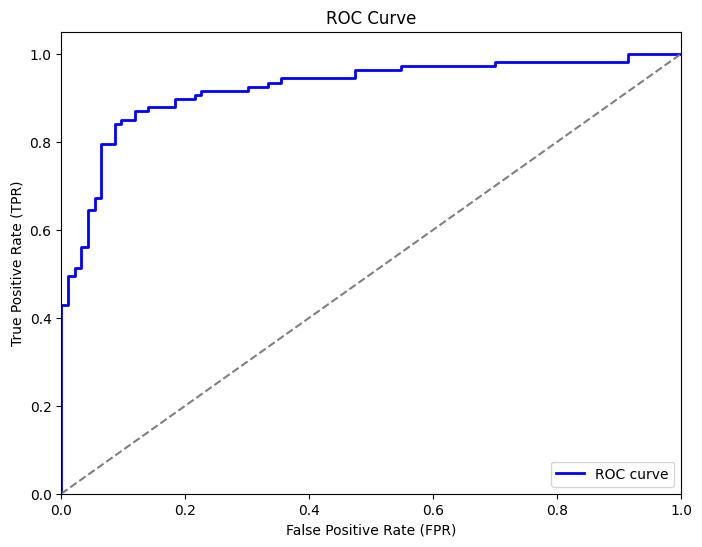

In [35]:
# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайной классификации
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Вычисляем значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score

In [36]:
# Вычисление значения ROC-AUC метрики
roc_auc = roc_auc_score(y_test, y_probs)
print(f"Значение ROC-AUC: {roc_auc:.2f}")

Значение ROC-AUC: 0.92


## Реализуем подсчет метрик TPR, FPR вручную

In [37]:
import numpy as np

def compute_tpr_fpr_manual(y_true, y_pred_probs, threshold):
    """
    Вычисляет TPR и FPR вручную для заданного порога.
    
    Parameters:
    y_true (array): Истинные метки классов (0 или 1)
    y_pred_probs (array): Предсказанные вероятности положительного класса
    threshold (float): Порог, выше которого предсказание будет считаться положительным
    
    Returns:
    TPR (float): Доля истинно положительных предсказаний (True Positive Rate)
    FPR (float): Доля ложно положительных предсказаний (False Positive Rate)
    """
    # Классификация по порогу
    y_pred_thresholded = (y_pred_probs >= threshold).astype(int)
    
    # Подсчет TP, FP, TN, FN
    TP = np.sum((y_true == 1) & (y_pred_thresholded == 1))
    FP = np.sum((y_true == 0) & (y_pred_thresholded == 1))
    TN = np.sum((y_true == 0) & (y_pred_thresholded == 0))
    FN = np.sum((y_true == 1) & (y_pred_thresholded == 0))
    
    # Вычисление TPR и FPR
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    
    return TPR, FPR

In [38]:
# Пример вычисления TPR и FPR для порога 0.5
threshold = 0.5
tpr_manual, fpr_manual = compute_tpr_fpr_manual(y_test, y_probs, threshold)
print(f"TPR (вручную): {tpr_manual:.2f}, FPR (вручную): {fpr_manual:.2f}")

TPR (вручную): 0.80, FPR (вручную): 0.09


## Строим ROC-кривую с помощью вычисленных вручную метрик и объеденение графиков

Чтобы построить ROC-кривую вручную, необходимо пройтись по множеству порогов (от 0 до 1) и для каждого порога вычислить TPR и FPR с помощью функции, созданной в задаче выше.

__Вычисление TPR и FPR для разных порогов:__

In [39]:
# Вычисление TPR и FPR вручную для различных порогов
thresholds_manual = np.linspace(0, 1, 100)  # Создаем 100 порогов от 0 до 1
tpr_list = []
fpr_list = []

for threshold in thresholds_manual:
    tpr, fpr = compute_tpr_fpr_manual(y_test, y_probs, threshold)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

__Визуализация ROC-кривой (ручной и с использованием sklearn):__

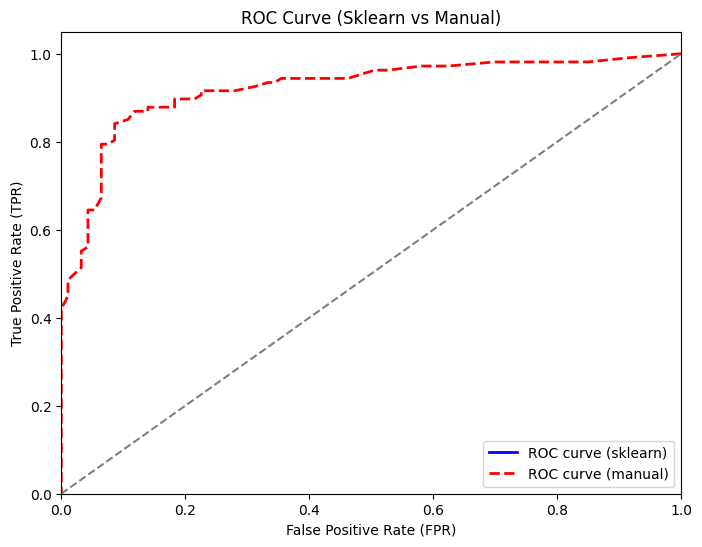

In [40]:
# Построение ROC-кривой с использованием sklearn и вручную
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (sklearn)')
plt.plot(fpr_list, tpr_list, color='red', lw=2, linestyle='--', label='ROC curve (manual)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайной классификации
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Sklearn vs Manual)')
plt.legend(loc="lower right")
plt.show()

## Постройте график Precision-Recall, используя метрики, посчитанные выше

__Функция для вычисления Precision и Recall вручную:__

In [41]:
def compute_precision_recall_manual(y_true, y_pred_probs, threshold):
    """
    Вычисляет Precision и Recall вручную для заданного порога.
    
    Parameters:
    y_true (array): Истинные метки классов (0 или 1)
    y_pred_probs (array): Предсказанные вероятности положительного класса
    threshold (float): Порог, выше которого предсказание будет считаться положительным
    
    Returns:
    Precision (float): Точность предсказаний (Precision)
    Recall (float): Полнота предсказаний (Recall)
    """
    # Классификация по порогу
    y_pred_thresholded = (y_pred_probs >= threshold).astype(int)
    
    # Подсчет TP, FP, FN
    TP = np.sum((y_true == 1) & (y_pred_thresholded == 1))
    FP = np.sum((y_true == 0) & (y_pred_thresholded == 1))
    FN = np.sum((y_true == 1) & (y_pred_thresholded == 0))
    
    # Вычисление Precision и Recall
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    return Precision, Recall

__Вычисление Precision и Recall для разных порогов:__

In [42]:
# Вычисление Precision и Recall для различных порогов
precision_list = []
recall_list = []

for threshold in thresholds_manual:
    precision, recall = compute_precision_recall_manual(y_test, y_probs, threshold)
    precision_list.append(precision)
    recall_list.append(recall)

__Визуализация графика Precision-Recall:__

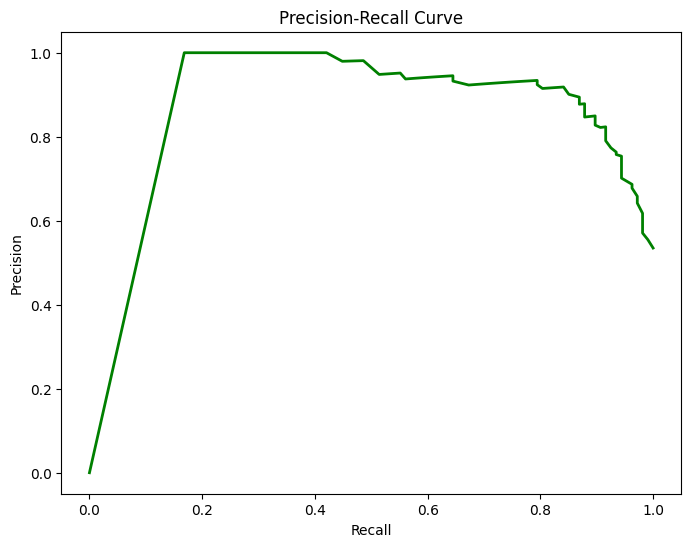

In [43]:
# Визуализация графика Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall_list, precision_list, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Вычислите значение ROC-AUC метрики, используя метрики, посчитанные вручную

Чтобы вычислить значение ROC-AUC метрики вручную, можно воспользоваться методом численного интегрирования, например, методом трапеций.

__Вычисление ROC-AUC вручную с использованием TPR и FPR:__

In [50]:
from numpy import trapz


# Если значения FPR идут в неправильном порядке, сортируем их вместе с TPR
if np.any(np.diff(fpr_list) < 0):
    sorted_indices = np.argsort(fpr_list)
    fpr_list = fpr_list[sorted_indices]
    tpr_list = tpr_list[sorted_indices]

# Вычисление AUC вручную с использованием метода трапеций
roc_auc_manual = trapz(tpr_list, fpr_list)
print(f"Значение ROC-AUC (вручную): {roc_auc_manual:.2f}")

Значение ROC-AUC (вручную): 0.92


__Выводы:__

- ROC-кривые: Обе ROC-кривые (рассчитанная вручную и с помощью sklearn) должны быть практически идентичны. Это подтверждает корректность вычислений вручную.
- ROC-AUC: Значение AUC, посчитанное вручную, должно быть аналогично тому, что рассчитано через sklearn.metrics.roc_auc_score, что также подтверждает правильность ручных вычислений.
- Precision-Recall кривая: Визуализируя график Precision-Recall, мы получаем дополнительную информацию о точности и полноте модели, что особенно полезно для анализа на несбалансированных выборках.